Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

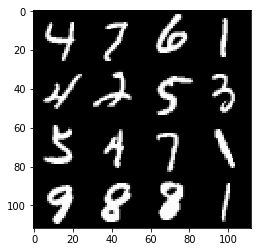

Reconstructed Images


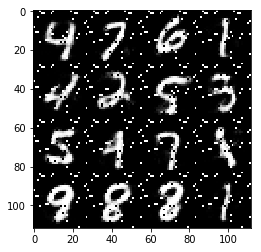

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

In [0]:
hello = tf.constant('hello world!')

with tf.Session() as sess:
  result = sess.run(hello)
  print(result)

b'hello world!'


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import random

In [0]:
class ToySequenceData(object):

  def __init__(self, sample_size, max_seq_len=20, min_seq_len=3, max_value=100):
    self.data = []
    self.labels = []
    self.seqlen = []

    for i in range(sample_size):
      len = random.randint(min_seq_len, max_seq_len)
      self.seqlen.append(len)

      if random.random() < 0.5:
        #linear data
        data_start = random.randint(0, max_value - len)
        s = [[float(i)/max_value] for i in range(data_start, data_start + len)]
        s += [[0.] for i in range(max_seq_len - len)]
        self.data.append(s)
        self.labels.append([1., 0.])
      else:
        #random data
        s = [[float(random.randint(0, max_value))/max_value] for i in range(len)]
        s += [[0.] for i in range(max_seq_len - len)]
        self.data.append(s)
        self.labels.append([0., 1.])
    self.batch_id = 0

  def next(self, batch_size):
    #print(len(self.data))
    if self.batch_id == len(self.data):
      self.batch_id = 0
    batch_x = self.data[self.batch_id: min(self.batch_id + batch_size, len(self.data))]
    batch_y = self.labels[self.batch_id: min(self.batch_id + batch_size, len(self.data))]
    batch_seqlen = self.seqlen[self.batch_id: min(self.batch_id + batch_size, len(self.data))]

    return batch_x, batch_y, batch_seqlen



In [0]:
dataset = ToySequenceData(sample_size=10000)
test_data = ToySequenceData(sample_size=1000)
batch_size = 200


In [0]:
learning_rate = 0.01
training_steps = 10000
batch_size = 128
display_step = 200

n_hidden = 64
seq_max_len = 20
n_classes = 2

x =  tf.placeholder(tf.float32, [None, seq_max_len, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
seqlen = tf.placeholder(tf.int32, [None])

weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
def dynamic_rnn(x, seqlen, weights, biases):
  
  x = tf.unstack(x, seq_max_len, 1)
  lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden)
  outputs, state = tf.contrib.rnn.static_rnn(lstm_cell, x, dtype=tf.float32, sequence_length=seqlen)

  outputs = tf.stack(outputs)
  outputs = tf.transpose(outputs, [1, 0, 2])

  #Hack to build the indexing and retrive the right output
  batch_size = tf.shape(outputs)[0]
  #Start indices for each sample
  index = tf.range(0, batch_size) * seq_max_len + (seqlen - 1)
  #Indexing
  outputs = tf.gather(tf.reshape(outputs, [-1, n_hidden]), index)

  #Linear activation, using outputs computed above
  return tf.matmul(outputs, weights['out']) + biases['out']

In [6]:
pred = dynamic_rnn(x, seqlen, weights, biases)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(pred, 1), tf.arg_max(y, 1)), dtype=tf.float32))
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)

  for step in range(1, training_steps+1):
    batch_x, batch_y, batch_seqlen = dataset.next(batch_size)
    sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, seqlen: batch_seqlen})

    if step%display_step==0 or step==1:
      acc, cost = sess.run([accuracy, loss], feed_dict={x: batch_x, y: batch_y, seqlen: batch_seqlen})
      print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.6f}".format(cost) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
  print("Optimization Finished!")
  
  acc, cost = sess.run([accuracy, loss], feed_dict={
    x: test_data.data, y: test_data.labels, seqlen: test_data.seqlen})
  print("Evaluation result: " + str(acc) + str(cost))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels inpu